## Image Compression Using K-means Clustering algorithm (Unsupervised)

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

## Steps for implementing K-means Clustering algorithm
- Randomly choose K datapoints as initial centroids
- assign each data point closest to the centroid
- calculate new cluster centroid
- checks if the convergence criteria is met

## Requried Libraries
- numpy (np): Handles arrays for pixel manipulation.
- PIL.Image: Used for opening and manipulating image files.
- matplotlib.pyplot: For displaying the images.
- mpimg: Loads the images for display.
- import os: Allows interaction with the operating system for file handling, checking file existence, and working with file paths. It's useful in file management tasks.
- with file paths. It's useful in file management tasks.
- %matplotlib inline: Ensures that plots generated with matplotlib are displayed inline within a Jupyter notebook making the output directly visible below the code cells.
- sklearn: For importing kmeans

In [65]:
# importing libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [53]:
# Getting image 
# we use Image.open() to open the image file
img = Image.open('ferrari.jpeg')

In [19]:
# we use np.asarray to convert image to array for easier manipulation
# in array each pixel representates RGB triplet
img_np = np.asarray(img)
# display the first 2 rows of the image array
img_np[0:2]

array([[[193,  97,  73],
        [187,  96,  69],
        [183,  94,  62],
        ...,
        [144, 164, 162],
        [134, 154, 152],
        [124, 144, 142]],

       [[189,  93,  69],
        [184,  93,  66],
        [183,  94,  62],
        ...,
        [ 90, 105, 100],
        [ 99, 114, 109],
        [107, 119, 115]]], dtype=uint8)

In [23]:
# get dimension of the image 
# img_np.shape: Provides the dimensions of the image, which returns a tuple of the form (height, width, channels).
# channels should be 3 (for RGB).
img_np.shape

(168, 299, 3)

In [27]:
# Step 4: Reshape the Data
# Reshape the image data into a two-dimensional array, where each row represents a pixel and each column represents
# a color channel (RGB)
pixels = img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape
# Reshape the image data from 3D (height, width, channels) to 2D (number of pixels, 3). This is necessary for applying K-means clustering.
# pixels.shape will output (total_pixels, 3), where 3 represents the RGB channels.

(50232, 3)

In [33]:
#import Kmeans
from sklearn.cluster import KMeans
# Defining the K-means model
# we define the kmeans clustering model with 16 clusters
model = KMeans(n_clusters=16)
model.fit(pixels)
# n_clusters=16: Specifies that we want to reduce the image to 16 colors (clusters).
# fit(pixels): Fits the K-means model to the image's pixel data.

C:\Users\rithi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=16)

In [35]:
# Step 6: Define the Cluster Centers
# Get the pixel cluster assignments (labels)
pixel_centroids = model.labels_
# Get the RGB values of the cluster centers (the 16 colors)
cluster_centers = model.cluster_centers_
# Display the pixel centroids (labels)
pixel_centroids
# model.labels_: Returns an array where each element represents the cluster assignment (centroid) for each pixel.
# model.cluster_centers_: Returns the RGB values for the 16 cluster centers (colors).

array([15, 15, 15, ...,  8,  8,  8])

In [37]:
cluster_centers

array([[206.3519695 ,  46.79288437,  42.98983482],
       [ 60.17132314,  61.40906695,  59.99156563],
       [ 37.84697827,  18.02292349,  15.8442989 ],
       [173.80283308, 176.58614089, 176.51646248],
       [ 91.25300523,   1.60698628,   1.93098572],
       [148.22044199,  72.26464088,  59.05414365],
       [160.75252133,   9.79325058,  16.38692785],
       [209.83800623, 148.70820353, 140.38733126],
       [  6.06791301,   3.55742083,   3.59799059],
       [216.60251234, 214.86720502, 214.11933603],
       [196.09337914,   6.87070581,  10.69800125],
       [ 97.28227324,  97.73127588,  95.06774558],
       [ 93.56592292,  48.39824206,  35.01893171],
       [134.56668424, 132.89826041, 129.13231418],
       [125.12857143,   2.53412698,   4.25456349],
       [202.06957133,  98.96416022,  85.97048489]])

In [47]:
# Step 7: Cluster Assignment
# Create an empty array to store the compressed image data
final = np.zeros((pixel_centroids.shape[0],3))
# Assign each pixel the color of its cluster center
for cluster_no in range(16):
    final[pixel_centroids==cluster_no]=cluster_centers[cluster_no]
# Display the first 5 rows of the compressed image data
final[0:5]

array([[202.06957133,  98.96416022,  85.97048489],
       [202.06957133,  98.96416022,  85.97048489],
       [202.06957133,  98.96416022,  85.97048489],
       [202.06957133,  98.96416022,  85.97048489],
       [202.06957133,  98.96416022,  85.97048489]])

In [51]:
# Step 8: Reshape to Original Dimensions
# Reshape the compressed image data back to its original dimensions (height, width, 4)
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3) 
# Display the shape of the compressed image
comp_image.shape
# Reshape the 2D array back into the original 3D shape (height, width, 4) to reconstruct the compressed image.

(168, 299, 3)

In [69]:
# Step 9: Convert the Pixel Values to Image
# Convert the numpy array of compressed image data back to an image
comp_image=Image.fromarray(np.uint8(comp_image))
# Save the compressed image
comp_image.save('ferrari_compressed.jpeg') 
# Load the original and compressed images for comparison
img_1 = mpimg.imread('ferrari.jpeg')
img_2 = mpimg.imread('ferrari_compressed.jpeg')

# Image.fromarray(): Converts the numpy array back into an image.
# np.uint8(): Converts the data into 8-bit unsigned integers (values between 0 and 255, which is the standard for image pixel data).
# comp_image.save(): Saves the compressed image as tiger_compressed.png.

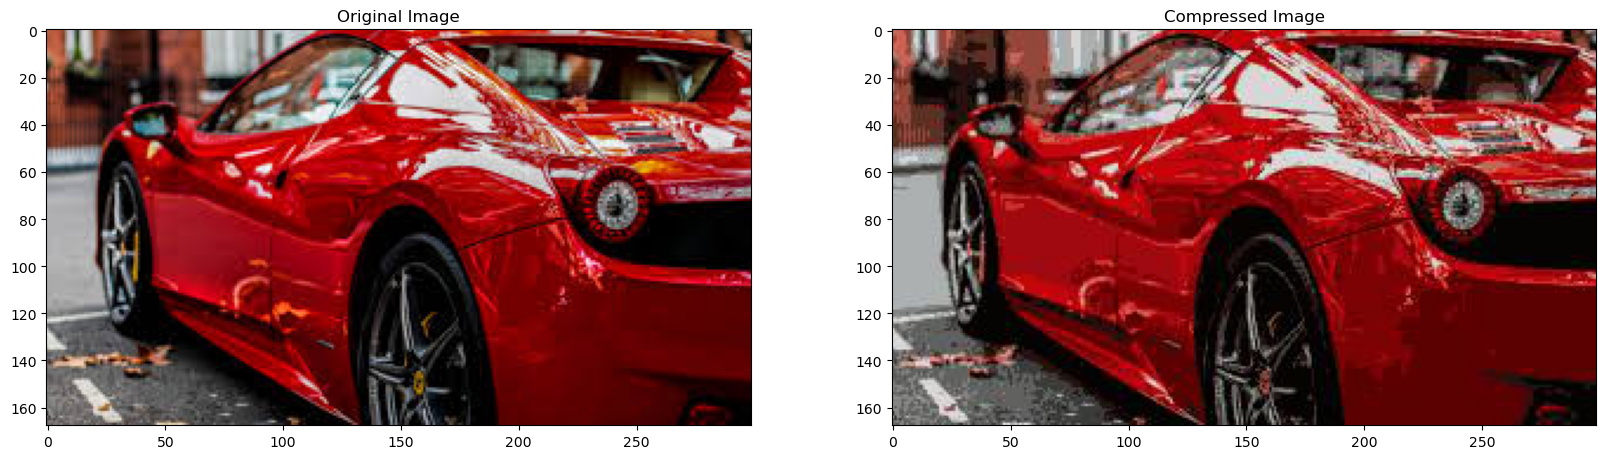

In [71]:
# Create a side-by-side comparison of the original image and the compressed image
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,20)) 
# Show the original image
ax1.imshow(img_1)
ax1.set_title('Original Image')
# Show the compressed image
ax2.imshow(img_2)
ax2.set_title('Compressed Image')
plt.show()